# An End-to-End Text Classification System

In this workshop you will implement a text classification system from scratch. This means that we will not rely on Keras' convenient data sets. These data sets are pre-processed and it will be useful if you know how to tokenise and find the word indices of text collections not provided by Keras.

The task will be to classify questions. To run this task we advice that you use [Google Colaboratory](https://colab.research.google.com) (also called Google Colab), which is a cloud solution to run Jupyter notebooks. The demonstrator will show how to use Google Colab. For additional information and to practice with the use of notebooks in Google Colab, you can also follow this link:

* [Welcome notebook and link to additional resources](https://colab.research.google.com/notebooks/welcome.ipynb)

## Question Classification

NLTK has a corpus of questions and their question types according to a particular classification scheme (e.g. DESC refers to a question expecting a descriptive answer, such as one starting with "How"; HUM refers to a question expecting an answer referring to a human). Below is an example of use of the corpus:

In [1]:
import nltk
nltk.download("qc")
from nltk.corpus import qc
train = qc.tuples("train.txt")
test = qc.tuples("test.txt")

[nltk_data] Downloading package qc to
[nltk_data]     C:\Users\K\AppData\Roaming\nltk_data...
[nltk_data]   Package qc is already up-to-date!


In [2]:
train[:3]

[('DESC:manner', 'How did serfdom develop in and then leave Russia ?'),
 ('ENTY:cremat', 'What films featured the character Popeye Doyle ?'),
 ('DESC:manner', "How can I find a list of celebrities ' real names ?")]

In [3]:
test[:3]

[('NUM:dist', 'How far is it from Denver to Aspen ?'),
 ('LOC:city', 'What county is Modesto , California in ?'),
 ('HUM:desc', 'Who was Galileo ?')]

### Exercise: Find all question types
Write Python code that lists all the possible question types of the training set (**remember: for data exploration, never look at the test set**).


In [4]:
#qtypes = # ... write your answer here
l = []
for i in train:
    l.append(i[0])
qtypes = list(set(l))


In [5]:
qtypes

['ABBR:exp',
 'NUM:code',
 'HUM:desc',
 'ENTY:currency',
 'ENTY:color',
 'LOC:state',
 'DESC:reason',
 'NUM:dist',
 'NUM:date',
 'NUM:ord',
 'ENTY:religion',
 'ENTY:sport',
 'ENTY:body',
 'HUM:title',
 'NUM:money',
 'ENTY:symbol',
 'NUM:volsize',
 'ABBR:abb',
 'NUM:perc',
 'ENTY:letter',
 'ENTY:techmeth',
 'ENTY:instru',
 'NUM:temp',
 'ENTY:product',
 'ENTY:animal',
 'DESC:def',
 'ENTY:substance',
 'NUM:count',
 'NUM:speed',
 'ENTY:word',
 'NUM:weight',
 'LOC:other',
 'NUM:period',
 'LOC:country',
 'ENTY:other',
 'HUM:gr',
 'LOC:mount',
 'ENTY:dismed',
 'ENTY:plant',
 'ENTY:veh',
 'ENTY:termeq',
 'ENTY:cremat',
 'DESC:manner',
 'ENTY:food',
 'LOC:city',
 'NUM:other',
 'HUM:ind',
 'ENTY:event',
 'ENTY:lang',
 'DESC:desc']

### Exercise: Find all general types

The question types have two parts. The first part describes a general type, and the second part defines a subtype. For example, the question type `DESC:manner` belongs to the general `DESC` type and within that type to the `manner` subtype. Let's focus on the general types only. Write Python code that lists all the possible general types (there are 6 of them).

In [6]:
l = []
for i in qtypes:
    l.append(i.split(":")[0])
general_types = list(set(l))
general_types

['LOC', 'ENTY', 'ABBR', 'NUM', 'HUM', 'DESC']

### Exercise: Partition the data
There is a train and test data, but for this exercise we want to have a partition into train, dev-test, and test. In this exercise, combine all data into one array and do a 3-way partition into train, dev-test, and test. Make sure that you shuffle the data prior to doing the partition. Also, make sure that you only use the general label types.

In [7]:
# ... write your answer here
l =[]
for i in train+test:
    x,y = i
    l.append((x.split(":")[0],y))
qdata = l
qdata

[('DESC', 'How did serfdom develop in and then leave Russia ?'),
 ('ENTY', 'What films featured the character Popeye Doyle ?'),
 ('DESC', "How can I find a list of celebrities ' real names ?"),
 ('ENTY',
  'What fowl grabs the spotlight after the Chinese Year of the Monkey ?'),
 ('ABBR', 'What is the full form of .com ?'),
 ('HUM', 'What contemptible scoundrel stole the cork from my lunch ?'),
 ('HUM', "What team did baseball 's St. Louis Browns become ?"),
 ('HUM', 'What is the oldest profession ?'),
 ('DESC', 'What are liver enzymes ?'),
 ('HUM', 'Name the scar-faced bounty hunter of The Old West .'),
 ('NUM', 'When was Ozzy Osbourne born ?'),
 ('DESC', 'Why do heavier objects travel downhill faster ?'),
 ('HUM', 'Who was The Pride of the Yankees ?'),
 ('HUM', 'Who killed Gandhi ?'),
 ('ENTY',
  'What is considered the costliest disaster the insurance industry has ever faced ?'),
 ('LOC', 'What sprawling U.S. state boasts the most airports ?'),
 ('DESC',
  'What did the only repealed

In [8]:
import random
random.seed(1234)
random.shuffle(qdata)
threshold1 = int(len(qdata)*.6)
threshold2 = int(len(qdata)*.8)
q_train = qdata[:threshold1]
q_devtest = qdata[threshold1:threshold2]
q_test = qdata[threshold2:]

### Exercise: Tokenise the data

Use Keras' tokeniser to tokenise all the data. For this exercise we will use only the 100 most frequent words in the training set (since you aren't supposed to use the dev-test or test sets to extract features).

In [9]:
from keras.preprocessing.text import Tokenizer

# write your code here
l = []
for i in q_train:
    l.append(i[1])
Tokenizer = Tokenizer(num_words=100)
Tokenizer.fit_on_texts(l)

In [10]:
l = []
for i in q_train:
    l.append(i[1])
indices_train = Tokenizer.texts_to_sequences(l)

l = []
for i in q_devtest:
    l.append(i[1])
indices_devtest = Tokenizer.texts_to_sequences(l)

l = []
for i in q_test:
    l.append(i[1])
indices_test = Tokenizer.texts_to_sequences(l)

In [11]:
l

['Which is a real berry : blackberry , cranberry , raspberry , strawberry ?',
 "What was Einstein 's IQ ?",
 'Where can I find the status of my tax return ?',
 "What is the abbreviation of the company name ` General Motors ' ?",
 'What country has problems with hooligans ?',
 'What is the cause of endangered species ?',
 "What is the world 's deadliest infectious disease ?",
 'What 19th-century writer had a country estate on the Hudson dubbed Sunnyside ?',
 'What state has the most Indians ?',
 "What is the origin of the city `` Corpus Christi '' ?",
 'How many islands does Fiji have ?',
 'Why do many Native American students not complete college ?',
 "What 1981 Candice Bergen-Jacqueline Bisset movie was a remake of 1943 's Old Acquaintance ?",
 "What cigarette company urged us , `` Come to where the flavor is ? ''",
 'What is an urban legend ?',
 'What wild and crazy guy wrote a book called Cruel Shoes ?',
 "Where 's the Petrified Forest ?",
 'Which presidents of the USA were Masons ?

### Exercise: Vectorize the data
The following code shows the distribution of lengths of my training data (could be different in your training data):

(array([  43., 1001., 1327.,  815.,  169.,  162.,   43.,    7.,    2.,
           2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

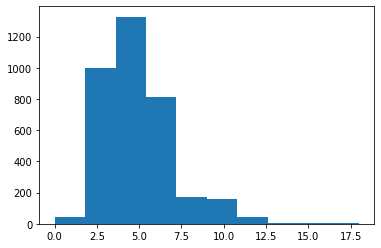

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist([len(d) for d in indices_train])

The histogram shows that the longest question in the training data has 18 word indices, but by far most of the questions have at least 10. Based on this, use Keras' `pad_sequences` to vectorize the questions into sequences of 10 word indices. The default will be to truncate the beginning, but we want to truncate the end (since the first words of a question are often very important to determine the question type). For this you can use the option `truncating='post'`: https://keras.io/preprocessing/sequence/

In [13]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 10
x_train = pad_sequences(indices_train, maxlen=maxlen, truncating='post')
x_devtest = pad_sequences(indices_devtest, maxlen=maxlen, truncating='post')
x_test = pad_sequences(indices_test, maxlen=maxlen, truncating='post')

### Exercise: Vectorise the labels
Convert the labels to one-hot encoding. If you use Keras' `to_categorical`, you will first need to convert the labels to integers.

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical([general_types.index(l)for l, t in q_train])
y_devtest = to_categorical([general_types.index(l)for l, t in q_devtest])
y_test = to_categorical([general_types.index(l)for l, t in q_test])



In [15]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

### Exercise: Define the model

Define a model for classification. For this model, use a feedforward architecture with an embedding layer of size 20, a layer that computes the average of word embeddings (use `GlobalAveragePooling1D`), a hidden layer of 16 units, and `relu` activation. You need to determine the size and activation of the output layer.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

embedding_dim = 20

# write your code here
model = Sequential()
model.add(Embedding(100, embedding_dim, input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 20)            2000      
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 2,438
Trainable params: 2,438
Non-trainable params: 0
_________________________________________________________________


### Exercise: Train and evaluate
Train your model. In the process you need to determine the optimal number of epochs. Then answer the following questions:
1. What was the optimal number of epochs and how did you determine this?
2. Is the system overfitting? Justify your answer.

In [18]:
# Write your code here
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics =['acc'])
history = model.fit(x_train, y_train,
                    epochs = 100,
                    batch_size=32,
                    validation_data = (x_devtest,y_devtest))

Epoch 1/100
112/112 [==============================] - 1s 2ms/step - loss: 1.7440 - acc: 0.2288 - val_loss: 1.6887 - val_acc: 0.2496
Epoch 2/100
112/112 [==============================] - 0s 911us/step - loss: 1.6305 - acc: 0.2915 - val_loss: 1.5688 - val_acc: 0.4244
Epoch 3/100
112/112 [==============================] - 0s 920us/step - loss: 1.4919 - acc: 0.4959 - val_loss: 1.4302 - val_acc: 0.5807
Epoch 4/100
112/112 [==============================] - 0s 875us/step - loss: 1.3463 - acc: 0.5903 - val_loss: 1.3041 - val_acc: 0.5714
Epoch 5/100
112/112 [==============================] - 0s 884us/step - loss: 1.2166 - acc: 0.6099 - val_loss: 1.1946 - val_acc: 0.6000
Epoch 6/100
112/112 [==============================] - 0s 875us/step - loss: 1.1183 - acc: 0.6402 - val_loss: 1.1145 - val_acc: 0.6378
Epoch 7/100
112/112 [==============================] - 0s 884us/step - loss: 1.0431 - acc: 0.6645 - val_loss: 1.0501 - val_acc: 0.6529
Epoch 8/100
112/112 [==============================] - 0s

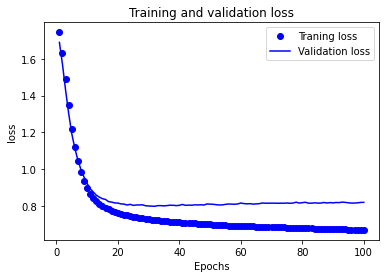

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Traning loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

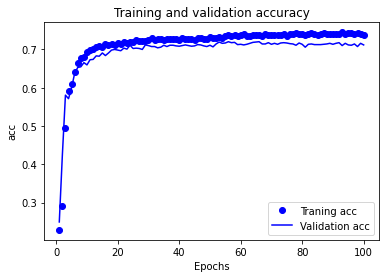

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [22]:
import numpy as np
np.amax(val_acc)

0.7201680541038513

### Optional Exercise: Data exploration
Plot the distribution of labels in the training data and compare with the distribution of labels in the devtest data. Plot also the distribution of predictions in the devtest data. What can you learn from this?

In [ ]:
# Write your code here

### Optional Exercise: Improve your system

Try the following options:

1. Use pre-trained word embeddings
2. Use recurrent neural networks.

Feel free to try each option separately and in combination, and compare the results. Feel also free to try with other variants of the initial architecture, such as:

1. Introducing more hidden layers.
2. Changing the size of embeddings.
3. Changing the number of units in the hidden layer(s).

In [ ]:
# Write your code here